<a href="https://colab.research.google.com/github/xprosis/rpi.applied.quantum/blob/main/RPI_Intro_to_Applied_Quantum_Week_2_Exercise_HaqueMoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RPI Intro to Applied Quantum (TECH-700-202501) - Moin Haque
Week 2 Exercise


In [16]:
# install the Qiskit SDK and Runtime along with visualization support
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

# install quantum computer simulator
!pip install qiskit-aer

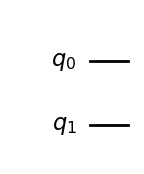

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# create quantum circuit with an empty 2-qubit quantum register: q0 and q1
qc = QuantumCircuit()
qr = QuantumRegister(2, 'q')
qc.add_register(qr)

# render the quantum circuit
qc.draw('mpl')

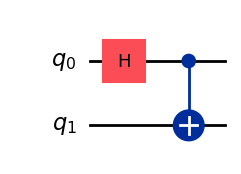

In [18]:
# add a Hadamard gate to qubit q0 to create superposition
qc.h(qr[0])

# add a controlled X-gate with control on q0 to setup entanglement
qc.cx(0,1)
qc.draw('mpl')

In [19]:
# setup to visualize the probability distribution
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

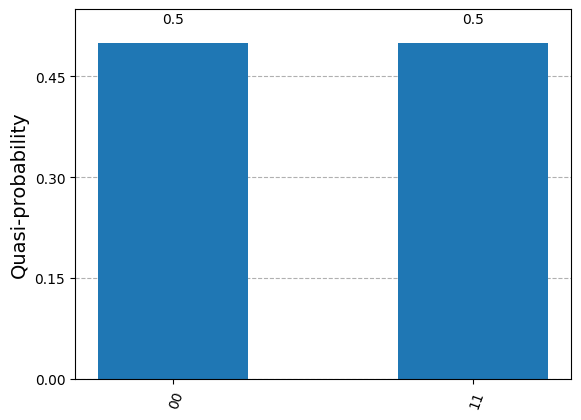

In [20]:
# let's compute the exact probability distribution for the quantum circuit
ideal_distribution = Statevector.from_instruction(qc).probabilities_dict()
plot_histogram(ideal_distribution)

# this shows the ideal distribution

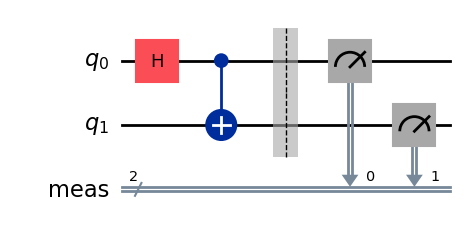

In [21]:
# adding physical measurments to the quantum circuit
qc.measure_all()
qc.draw('mpl')

In [22]:
# setting up the simulated quantum computer
from qiskit_aer import Aer, AerSimulator
from qiskit import transpile

In [23]:
# building the simulated quantum computer
simulator = AerSimulator()
transpiled_circuit = transpile(qc,simulator)

result = simulator.run(transpiled_circuit).result()

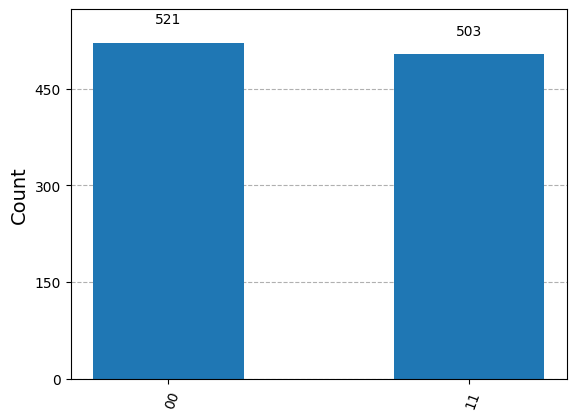

In [24]:
plot_histogram(result.get_counts())

# observing deviation from the ideal distribution - however this is from a finite set of samples

In [27]:
# we can increase the number of samples taken - which can be done by the number of simulations we run on the quantum computer - this is called "shots" when running

shots = 1000000
result = simulator.run(transpiled_circuit, shots=shots).result()

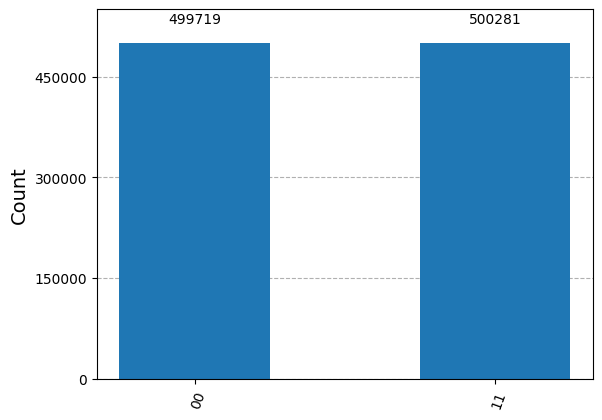

In [28]:

plot_histogram(result.get_counts())

# shows a better estimate of the probability distribution